## Analysis Notebook
The purpose of this notebook is to analyze the daily sales of ice creams at metro areas in the USA. Subsets corresponding to yearly sales are also profiled. Plots of auto-correlation and maximum daily sales per week are also provided.

In [1]:
import pandas as pd
import numpy as np
fp = "../data/daily_ice_cream_sales.csv"
df = pd.read_csv(fp)
df["Date"] = pd.to_datetime(df["Date"])
df["log_daily_sales"] = np.log(df["ice_cream_purchases"])

In [2]:
df["Date"].max()

Timestamp('2024-05-18 00:00:00')

In [3]:
df["Date"].min()

Timestamp('2020-01-01 00:00:00')

In [4]:
import matplotlib.pyplot as plt

## Extract yearly data subsets

In [5]:
df_2020 = df[df.Date.dt.year == 2020]
df_2021 = df[df.Date.dt.year == 2021]
df_2022 = df[df.Date.dt.year == 2022]
df_2023 = df[df.Date.dt.year == 2023]

In [6]:
%matplotlib inline
import statsmodels.api as sm

<AxesSubplot:>

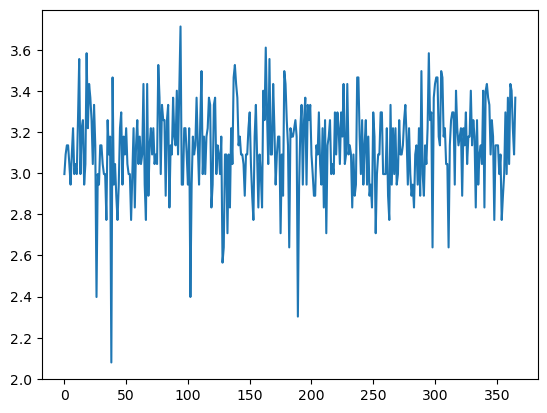

In [7]:
df_2020["log_daily_sales"].plot()

## Plot Autocorrelation
The auto correlation plots are shown below. 

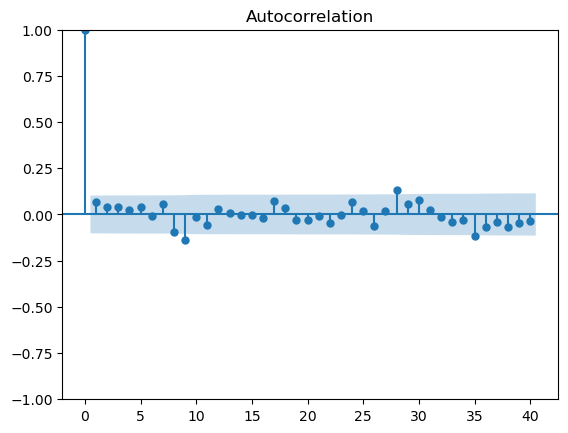

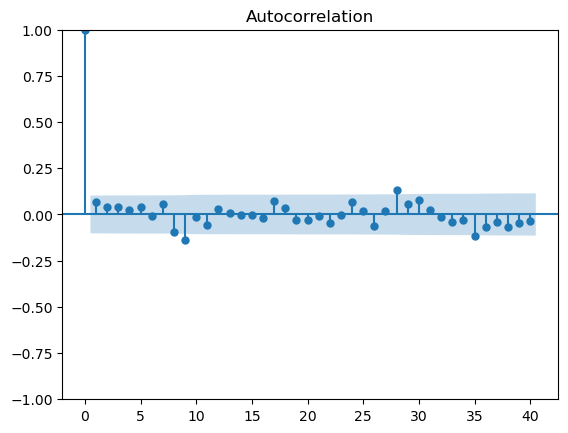

In [8]:
sm.graphics.tsa.plot_acf(df_2020["log_daily_sales"], lags=40)

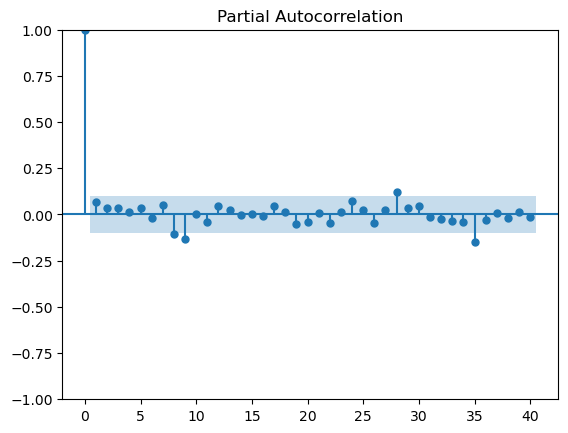

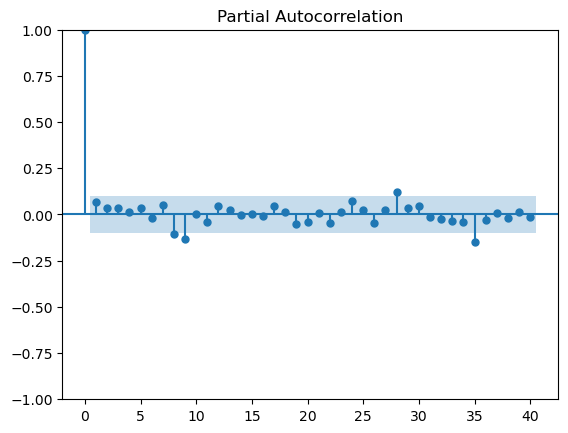

In [9]:
sm.graphics.tsa.plot_pacf(df_2020["log_daily_sales"], lags=40, method="ywm")

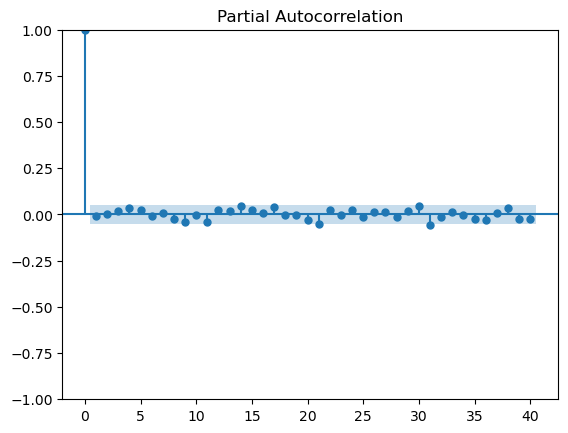

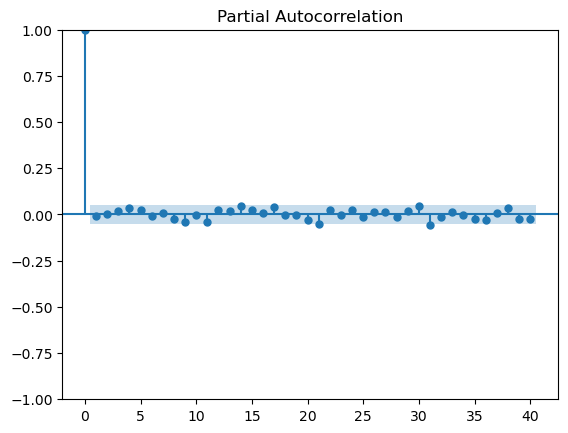

In [10]:
sm.graphics.tsa.plot_pacf(df["log_daily_sales"], lags=40, method="ywm")

## Observation
It appears that daily sales are not correlated, but independent draws from a distribution. This looks like a white noise process. This is consistent with synthetically generated data. A dickey fuller test with no regression (constant, this is the default) also suggests the same.

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["log_daily_sales"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -40.221392
p-value: 0.000000


In [12]:
df_2020

,Date,ice_cream_purchases,log_daily_sales
0,2020-01-01,20,2.995732
1,2020-01-02,22,3.091042
2,2020-01-03,23,3.135494
3,2020-01-04,23,3.135494
4,2020-01-05,21,3.044522
...,...,...,...
361,2020-12-27,31,3.433987
362,2020-12-28,30,3.401197
363,2020-12-29,25,3.218876
364,2020-12-30,22,3.091042


In [13]:

df["log_daily_sales"] = np.log(df["ice_cream_purchases"])

In [14]:
df_yearly_ice_cream_sales = df.set_index("Date").resample("Y").sum()

In [15]:
df_yearly_ice_cream_sales

,ice_cream_purchases,log_daily_sales
Date,,
2020-12-31,8488,1142.662667
2021-12-31,8224,1128.462655
2022-12-31,8206,1127.813921
2023-12-31,8379,1135.628790
2024-12-31,3188,432.632764


<AxesSubplot:>

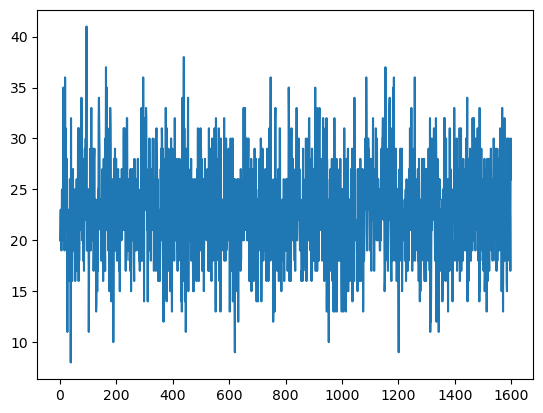

In [16]:
df["ice_cream_purchases"].plot()

In [17]:
fpmeanweekly = "../data/mean_weekly_ice_cream_sales.csv"
dfwmics = pd.read_csv(fpmeanweekly)

<AxesSubplot:>

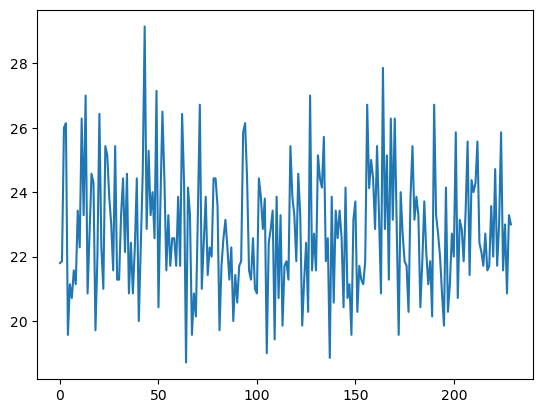

In [18]:
dfwmics["ice_cream_purchases"].plot()

In [19]:
dfwmics["weekno"] = range(1,dfwmics.shape[0] + 1)

In [20]:
dfwmics

,year,week,ice_cream_purchases,weekno
0,2020,1,21.800000,1
1,2020,2,21.857143,2
2,2020,3,26.000000,3
3,2020,4,26.142857,4
4,2020,5,19.571429,5
...,...,...,...,...
225,2024,16,21.571429,226
226,2024,17,23.000000,227
227,2024,18,20.857143,228
228,2024,19,23.285714,229
